In [12]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


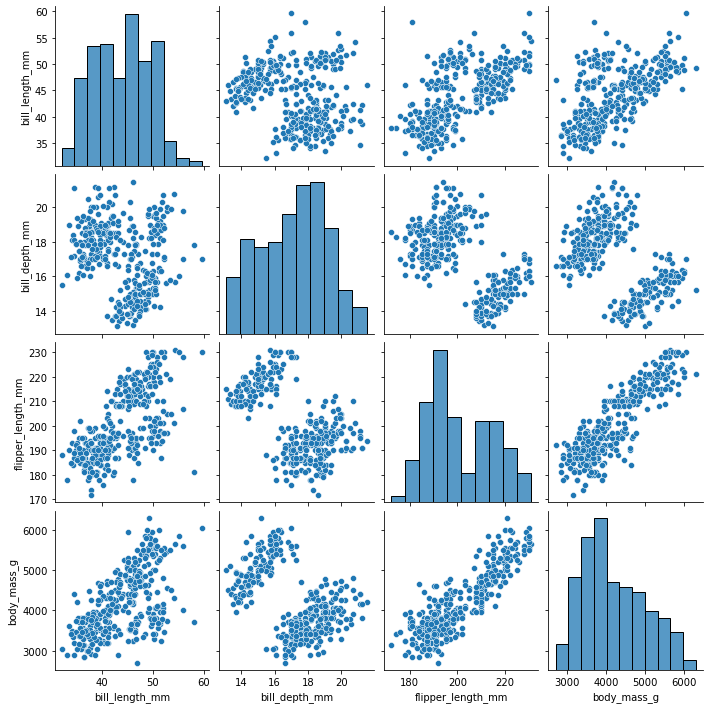

In [4]:
sns.pairplot(penguins)

I can see 3 different types of clusters. There is the cluster that looks like a straight line, a cluster that is 2 clusters with each other and there is a cluster which is 1 cluster but not in a specific shape.

In [18]:
penguins = penguins.dropna()

In [27]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [28]:
penguins['cluster'] = km.predict(penguins[features])

In [29]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [30]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

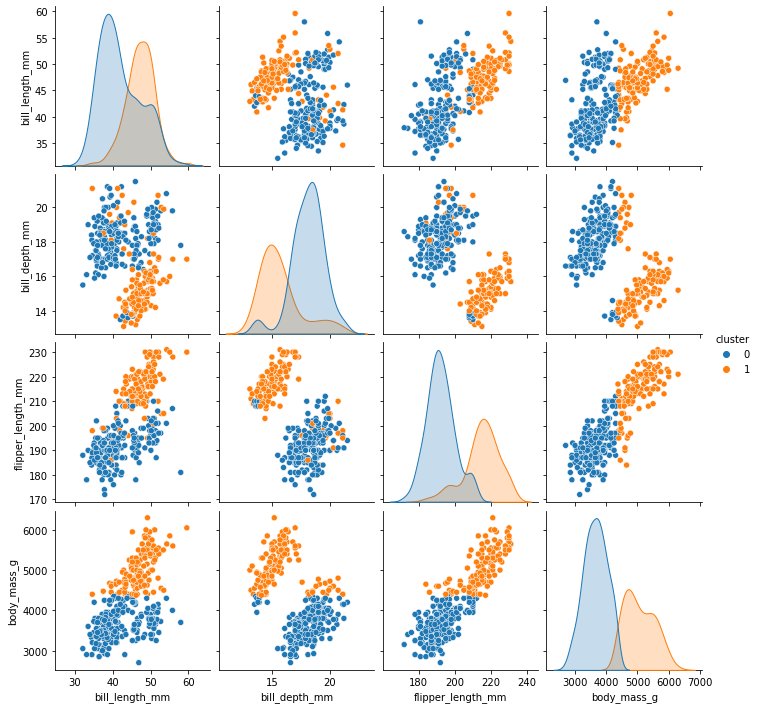

In [31]:
sns.pairplot(penguins, hue="cluster")

In [32]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,132,14
Chinstrap,63,5
Gentoo,8,111


Most of Adelie and Chinstrap ended up in the same cluster. This could mean that there are not too many differences between the two species. Gentoos features are different enough that it goes into a seperate cluster. 